# Import the Data and Wrangle to focus specifically on all bats heard in the Mullen Fire footprint.

In [1]:
#Import necessary objects from other notebooks
%store -r data2025_dir mtbs_dir mtbs_gdf site_dir


In [33]:
# Import necessary packages

# Importing and accessing CSC
import pandas as pd
import os
import re

# Working with Dataframes
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

In [3]:
# Import the necessary function
from site_utils import load_csv_data

#Use the function load_csv_data to access your 
csv_filename = 'COFires_bats_2024.csv'
csv_df = load_csv_data(csv_filename, data2025_dir)
csv_df.head()

✅ Loaded 'COFires_bats_2024.csv' with 1874 rows and 20 columns.


,site,date,hi_pass,lo_pass,Myyu,Myca,Myci,Myvo,Mylu,Pahe,Anpa,Epfu,Lano,Coto,Myth,Tabr,Laci,Euma,year,area
0,CP1-038,7/22/2024,380,30,0,0,0,16,0,0,0,0,10,0,0,0,0,0,2024,CP1
1,CP1-038,7/23/2024,384,24,0,0,0,11,1,0,0,0,7,0,0,0,0,0,2024,CP1
2,CP1-038,7/24/2024,510,55,0,0,0,15,0,0,0,0,8,0,0,0,0,0,2024,CP1
3,CP1-038,7/25/2024,207,31,0,0,0,4,0,0,0,0,2,0,0,0,0,0,2024,CP1
4,CP1-038,7/26/2024,337,15,0,0,0,3,0,0,0,0,0,0,1,1,1,0,2024,CP1


# Data Wrangling

In [4]:
# Load in the CSV
csv_path = "/Users/erinzimmerman/earth-analytics/data2025/wildfire/COFires_bats_2024.csv"

# Preview the cleaned-up DataFrame
csv_df.head()

,site,date,hi_pass,lo_pass,Myyu,Myca,Myci,Myvo,Mylu,Pahe,Anpa,Epfu,Lano,Coto,Myth,Tabr,Laci,Euma,year,area
0,CP1-038,7/22/2024,380,30,0,0,0,16,0,0,0,0,10,0,0,0,0,0,2024,CP1
1,CP1-038,7/23/2024,384,24,0,0,0,11,1,0,0,0,7,0,0,0,0,0,2024,CP1
2,CP1-038,7/24/2024,510,55,0,0,0,15,0,0,0,0,8,0,0,0,0,0,2024,CP1
3,CP1-038,7/25/2024,207,31,0,0,0,4,0,0,0,0,2,0,0,0,0,0,2024,CP1
4,CP1-038,7/26/2024,337,15,0,0,0,3,0,0,0,0,0,0,1,1,1,0,2024,CP1


In [5]:
# Trim whitespace in string colums, just in case
csv_df['site'] = csv_df['site'].str.strip()
csv_df['area'] = csv_df['area'].str.strip()

# Check date types
csv_df.dtypes


site       object
date       object
hi_pass     int64
lo_pass     int64
Myyu        int64
Myca        int64
Myci        int64
Myvo        int64
Mylu        int64
Pahe        int64
Anpa        int64
Epfu        int64
Lano        int64
Coto        int64
Myth        int64
Tabr        int64
Laci        int64
Euma        int64
year        int64
area       object
dtype: object

In [6]:
# Convert dates from being objects to intigers. 
csv_df['date'] = pd.to_datetime(csv_df['date'], errors='coerce')

In [7]:
# Identify missing values
csv_df.isnull().sum()

site       0
date       0
hi_pass    0
lo_pass    0
Myyu       0
Myca       0
Myci       0
Myvo       0
Mylu       0
Pahe       0
Anpa       0
Epfu       0
Lano       0
Coto       0
Myth       0
Tabr       0
Laci       0
Euma       0
year       0
area       0
dtype: int64

In [8]:
# Narrow it down to the correct fire
### figure out which rows are part of Mullen Fire by looking for MU in the site name
mullen_csv_df = csv_df[csv_df['site'].str.contains("MU", na=False)]

mullen_csv_df


,site,date,hi_pass,lo_pass,Myyu,Myca,Myci,Myvo,Mylu,Pahe,Anpa,Epfu,Lano,Coto,Myth,Tabr,Laci,Euma,year,area
176,SMU14440,2024-05-22,6,5,0,0,0,0,0,0,0,0,2,0,0,0,1,0,2024,SMU
177,SMU14440,2024-05-23,0,4,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2024,SMU
178,SMU14440,2024-05-24,15,7,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2024,SMU
179,SMU14440,2024-05-25,3,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2024,SMU
180,SMU14440,2024-05-26,12,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2024,SMU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,MU1-127,2024-08-14,66,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2024,MU1
1870,MU1-127,2024-08-15,11,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2024,MU1
1871,MU1-127,2024-08-16,96,5,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2024,MU1
1872,MU1-127,2024-08-17,38,6,0,0,0,0,0,0,0,0,3,0,0,0,0,0,2024,MU1


In [9]:
# Filter to just 'MU' fire sites
mu_mask = csv_df['site'].str.startswith("MU", na=False)
mullen_csv_df = csv_df[mu_mask].copy()

# Extract severity and site number from 'MUx-yyy' format
pattern = r"MU(\d)-(\d{3})"
mullen_csv_df[['severity', 'site_num']] = mullen_csv_df['site'].str.extract(pattern)

# Drop rows where extraction failed (i.e., the format didn't match)
mullen_csv_df.dropna(subset=['severity', 'site_num'], inplace=True)

# Convert types
mullen_csv_df['severity'] = mullen_csv_df['severity'].astype(int)
mullen_csv_df['site_num'] = mullen_csv_df['site_num'].astype(int)

mullen_csv_df



,site,date,hi_pass,lo_pass,Myyu,Myca,Myci,Myvo,Mylu,Pahe,...,Lano,Coto,Myth,Tabr,Laci,Euma,year,area,severity,site_num
627,MU2-038,2024-07-22,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2024,MU2,2,38
628,MU2-038,2024-07-23,0,4,0,0,0,0,0,0,...,0,0,0,1,0,0,2024,MU2,2,38
1266,MU4-128,2024-06-05,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,2024,MU4,4,128
1267,MU4-128,2024-06-06,2,5,0,0,0,0,0,0,...,0,0,0,0,1,0,2024,MU4,4,128
1268,MU4-128,2024-06-07,1,2,0,0,0,0,0,0,...,1,0,0,0,1,0,2024,MU4,4,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,MU1-127,2024-08-14,66,6,0,0,0,0,0,0,...,0,0,0,0,0,0,2024,MU1,1,127
1870,MU1-127,2024-08-15,11,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2024,MU1,1,127
1871,MU1-127,2024-08-16,96,5,0,0,0,0,0,0,...,2,0,0,0,0,0,2024,MU1,1,127
1872,MU1-127,2024-08-17,38,6,0,0,0,0,0,0,...,3,0,0,0,0,0,2024,MU1,1,127


# Wrangling for the site data. 
This data does not have column headers and is in a different format from the previous data. From this sheet will will need to get the geometry data so that it can be merged with the bat count data. 

In [10]:
#Use the function load_csv_data to access your 
csv_filename = 'site_data_2024.csv'
site_df = load_csv_data(csv_filename, data2025_dir)
site_df.head()

✅ Loaded 'site_data_2024.csv' with 134 rows and 26 columns.


,Site,Point Number,Zone,Lattitude,Longitude,Date Set,Date Pulled,TN,Set Type,Ult Mic AZ,...,Detection Angle,Green BA,Red BA,Grey BA,Shrub Cover,Total VO,Total Canopy Cover,Majority Species,Unnamed: 24,Unnamed: 25
0,CP-007,007,CP,40.53952,-105.86966,2024-07-01,2024-07-17,16d,Both,122.0,...,53,9.0,0.0,7,25.0,NaN,NaN,NaN,NaN,NaN
1,CP-008,008,CP,40.58356,-106.00157,2024-07-03,2024-07-22,18d 23h 5m 43s,Both,284.0,...,44,2.0,0.0,1,20.0,NaN,NaN,NaN,NaN,NaN
2,CP-031,031,CP,40.62012,-105.83293,2024-06-11,2024-07-02,21d 4h 39m 47s,Both,52.0,...,36,0.0,0.0,9,1.0,NaN,NaN,NaN,NaN,NaN
3,CP-038,038,CP,40.40217,-105.63556,2024-07-22,2024-08-05,13d 21h 40m 48s,ARU Only,169.0,...,0,16.0,0.0,3,10.0,NaN,NaN,NaN,NaN,NaN
4,CP-045,045,CP,40.68795,-105.86034,2024-06-12,2024-07-01,19d,Both,33.0,...,38,6.0,0.0,8,25.0,NaN,NaN,NaN,NaN,NaN


In [11]:
# Filter to just 'MU' fire sites
mu_mask = site_df['Site'].str.startswith("MU", na=False)
mullen_site_df = site_df[mu_mask].copy()

mullen_site_df

,Site,Point Number,Zone,Lattitude,Longitude,Date Set,Date Pulled,TN,Set Type,Ult Mic AZ,...,Detection Angle,Green BA,Red BA,Grey BA,Shrub Cover,Total VO,Total Canopy Cover,Majority Species,Unnamed: 24,Unnamed: 25
79,MU-008,008,MU,40.94369,-1.062633e+02,2024-08-01,2024-08-20,19d 1h 17m 30s,Both,311.0,...,42,0.0,0.0,3,2.0,NaN,NaN,NaN,NaN,NaN
80,MU-022,022,MU,41.02250,-1.062507e+02,2024-08-01,2024-08-20,19d,Cam Only,NaN,...,55,0.0,0.0,0,1.0,NaN,NaN,NaN,NaN,NaN
81,MU-033,033,MU,40.93406,-1.061897e+02,2024-07-09,2024-08-01,22d 21h 17m 5s,Both,168.0,...,33,11.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
82,MU-036,036,MU,41.09651,-1.062977e+02,2024-07-08,2024-07-31,22d 21h 55m 35s,Cam Only,NaN,...,40,0.0,0.0,2,10.0,NaN,NaN,NaN,NaN,NaN
83,MU-051,051,MU,41.08498,-1.062477e+02,2024-07-31,2024-08-19,19d 7h 20m 57s 0ms,Both,317.0,...,57,0.0,0.0,0,35.0,NaN,NaN,NaN,NaN,NaN
84,MU-069,069,MU,41.09507,-1.062190e+02,2024-07-08,2024-07-31,22d 20h 13m 53s,Both,246.0,...,45,0.0,0.0,6,30.0,NaN,NaN,NaN,NaN,NaN
85,MU-083,083,MU,41.07630,-1.061620e+02,2024-07-09,2024-07-30,21d 3h 10m 16s,Both,29.0,...,47,6.0,1.0,7,3.0,NaN,NaN,NaN,NaN,NaN
86,MU-088,088,MU,41.19696,-1.063063e+02,2024-07-09,2024-07-30,21d,Both,185.0,...,53,3.0,0.0,4,1.0,NaN,NaN,NaN,NaN,NaN
87,MU-096,096,MU,41.14313,-1.062018e+02,2024-07-10,2024-07-30,20d 5h 15m 30s,Cam Only,NaN,...,41,0.0,0.0,8,4.0,NaN,NaN,NaN,NaN,NaN
88,MU-098,098,MU,41.19889,-1.062824e+02,2024-07-30,2024-08-19,20d 3h 8m 54s,Both,227.0,...,56,11.0,0.0,0,1.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove leading zeros from the Point Number column and rename the column site_num
# Remove leading zeros from the 'Point Number' column
mullen_site_df['Point Number'] = mullen_site_df['Point Number'].str.lstrip('0')

# Rename the column to 'site_num'
mullen_site_df.rename(columns={'Point Number': 'site_num'}, inplace=True)

# Check the result
print(mullen_site_df.head())


In [31]:
# Create a geometry column from lon/lat
geometry = [Point(xy) for xy in zip(mullen_site_df['Longitude'], mullen_site_df['Lattitude'])]

# Convert to GeoDataFrame
mullen_site_gdf = gpd.GeoDataFrame(mullen_site_df, geometry=geometry)

# Set the coordinate reference system (CRS) to WGS84 (lat/lon)
mullen_site_gdf.set_crs(epsg=4326, inplace=True)

### simplify columns
mullen_site_gdf = mullen_site_gdf[['site_num', 'Date Set', 'Date Pulled',
                'geometry']]

# Convert 'site_num' to string in both DataFrames to ensure compatibility
mullen_site_gdf['site_num'] = mullen_site_gdf['site_num'].astype(str)
mullen_csv_df['site_num'] = mullen_csv_df['site_num'].astype(str)


In [35]:
# Combine the Monitoring Data with the site boundaries data

# Merge the gdf and df on a common column
mullen_site_gdf = mullen_site_gdf.merge(mullen_csv_df, on='site_num') #Mullen site gdf refers to the combined boundary of the fire with the collection points. 

# # Create a plot
# fig, ax = plt.subplots(figsize=(10, 10))

# # Plot the GeoDataFrame
# mullen_site_gdf.plot(column='geometry', ax=ax, legend=True)

# # Label axes
# ax.set_xlabel('Longitude')  # Change label as needed
# ax.set_ylabel('Latitude')   # Change label as needed

# # Customize the title and other aesthetics
# ax.set_title('Your Plot Title')

# # Show the plot
# plt.show()

In [36]:
mullen_site_gdf

,site_num,Date Set,Date Pulled,geometry,site_x,date_x,hi_pass_x,lo_pass_x,Myyu_x,Myca_x,...,Epfu,Lano,Coto,Myth,Tabr,Laci,Euma,year,area,severity
0,8,2024-08-01,2024-08-20,POINT (-106.26334 40.94369),MU3-008,2024-08-01,71,20,0,0,...,2,4,0,0,0,1,0,2024,MU3,3
1,8,2024-08-01,2024-08-20,POINT (-106.26334 40.94369),MU3-008,2024-08-01,71,20,0,0,...,0,3,0,0,0,1,0,2024,MU3,3
2,8,2024-08-01,2024-08-20,POINT (-106.26334 40.94369),MU3-008,2024-08-01,71,20,0,0,...,0,3,0,0,0,0,0,2024,MU3,3
3,8,2024-08-01,2024-08-20,POINT (-106.26334 40.94369),MU3-008,2024-08-01,71,20,0,0,...,0,2,0,0,0,0,0,2024,MU3,3
4,8,2024-08-01,2024-08-20,POINT (-106.26334 40.94369),MU3-008,2024-08-01,71,20,0,0,...,0,3,0,0,0,1,0,2024,MU3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221031,91,2024-06-18,2024-07-09,POINT (-106.30634 41.19696),MU2-091,2024-07-08,11,11,0,0,...,0,1,0,0,0,0,0,2024,MU2,2
221032,91,2024-06-18,2024-07-09,POINT (-106.30634 41.19696),MU2-091,2024-07-08,11,11,0,0,...,0,9,0,0,0,0,0,2024,MU2,2
221033,91,2024-06-18,2024-07-09,POINT (-106.30634 41.19696),MU2-091,2024-07-08,11,11,0,0,...,0,2,0,1,0,0,0,2024,MU2,2
221034,91,2024-06-18,2024-07-09,POINT (-106.30634 41.19696),MU2-091,2024-07-08,11,11,0,0,...,0,0,0,0,0,0,0,2024,MU2,2


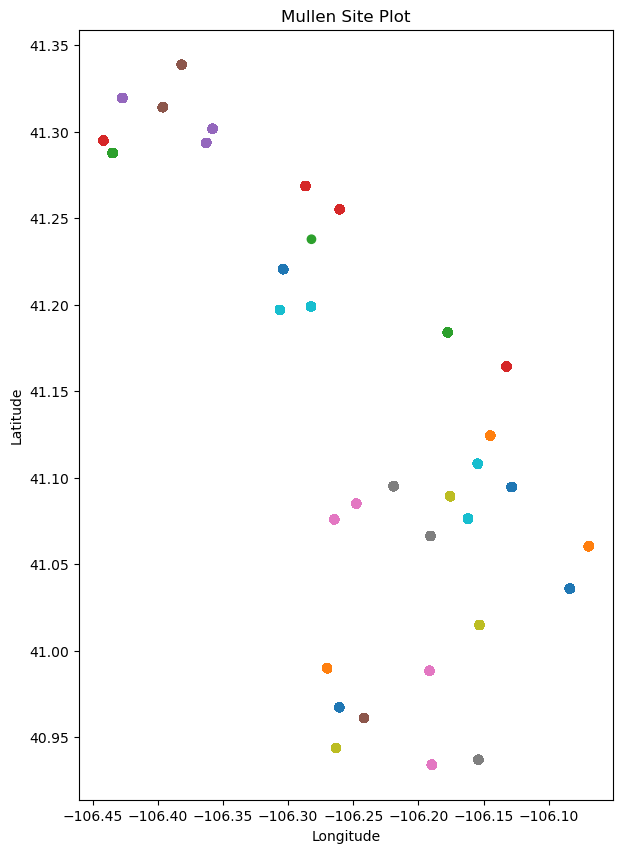

In [38]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame (optional: you can specify columns to color by)
mullen_site_gdf.plot(ax=ax, column='site_num')

# Customize the plot (e.g., add title, axis labels)
ax.set_title('Mullen Site Plot')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

/var/folders/j7/815c6qns6g39vvr0gw7cftfm0000gn/T/ipykernel_34689/3922580396.py:13: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  mullen_site_gdf.plot(ax=ax, column='site_num', legend=True, marker='o', color='red', markersize=5)


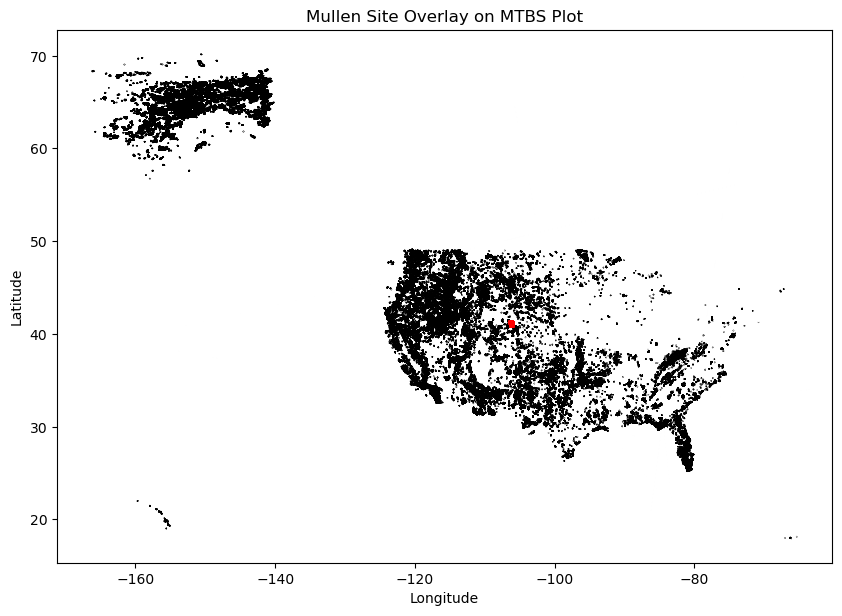

In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Assuming mullen_site_gdf and mtbs_gdf are your GeoDataFrames
# Plot the mtbs_gdf first (as the background)
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the mtbs_gdf GeoDataFrame (background)
mtbs_gdf.plot(ax=ax, color='lightgray', edgecolor='black')  # Adjust color as needed

# Now plot mullen_site_gdf on top of mtbs_gdf
mullen_site_gdf.plot(ax=ax, column='site_num', legend=True, marker='o', color='red', markersize=5)

# Customize plot (title, axis labels)
ax.set_title('Mullen Site Overlay on MTBS Plot')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


In [14]:
# Store the essential information to import into the next notebook
%store mullen_csv_df 


Stored variables and their in-db values:
band_dict                             -> {'green': <xarray.DataArray (y: 447, x: 504)> Size
climate_models                        -> ['HadGEM2-CC365', 'MIROC-ESM', 'MRI-CGCM3', 'IPSL-
crowley_gdf                           ->            Loc_Nm                                 
crowley_srtm_da                       -> <xarray.DataArray (y: 462, x: 391)> Size: 723kB
ar
data2025_dir                          -> '/Users/erinzimmerman/earth-analytics/data2025/wil
data_dir                              -> '/Users/erinzimmerman/earth-analytics/data2025/hab
denver_ndvi_da                        -> <xarray.DataArray (y: 447, x: 504)> Size: 901kB
ar
denver_redlining_gdf                  ->       area_id    city state  city_survey          
denver_redlining_ndvi_gdf             ->         area_id    city state  city_survey        
early_century                         -> [2006, 2011, 2016, 2021, 2026, 2031, 2036]
habitat1_gdf                          ->      N